<a href="https://colab.research.google.com/github/Panashe1812/Masters-Project/blob/main/SaliencyMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torch
import torch
import torchvision
import  torchvision.transforms as transforms
from PIL import Image

In [ ]:
path_img = './val_/Latino_Hispanic/1024.jpg'

In [ ]:
path3 = './vgg16_model_29_epoch.pth'
model = (torch.load(path3,map_location=torch.device('cpu')))
model.eval()

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
#load pretrained resnet model

print(model)

#define transforms to preprocess input image into format expected by model
normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
#inverse transform to get normalize image back to original form for visualization
inv_normalize = transforms.Normalize(
    mean=[-0.485/0.229, -0.456/0.224, -0.406/0.255],
    std=[1/0.229, 1/0.224, 1/0.255]
)

#transforms to resize image to the size expected by pretrained model,
#convert PIL image to tensor, and
#normalize the image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    normalize,          
])

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def saliency(img, model,idx):
    #we don't need gradients w.r.t. weights for a trained model
    for param in model.parameters():
        param.requires_grad = False
    
    #set model in eval mode
    model.eval()
    #transoform input PIL image to torch.Tensor and normalize
    input = transform(img)
    input.unsqueeze_(0)

    #we want to calculate gradient of higest score w.r.t. input
    #so set requires_grad to True for input 
    input.requires_grad = True
    #forward pass to calculate predictions
    preds = model(input)
    score, indices = torch.max(preds, 1)
    #backward pass to get gradients of score predicted class w.r.t. input image
    score.backward()
    #get max along channel axis
    slc, _ = torch.max(torch.abs(input.grad[0]), dim=0)
    #normalize to [0..1]
    slc = (slc - slc.min())/(slc.max()-slc.min())
    
   
        
    class_map = {0:'Latino_Hispanic',
             1:'East Asian',
             2:'Indian',
             3:'Middle Eastern',
             4:'Black',
             5:'Southeast Asian',
             6:'White'
             }
    
    #apply inverse transform on image
    with torch.no_grad():
        input_img = inv_normalize(input[0])
    #plot image and its saleincy map
    plt.figure(figsize=(7, 7))
    plt.subplot(1, 2, 1)
    plt.imshow(np.transpose(input_img.detach().numpy(), (1, 2, 0)))
    plt.xticks([])
    plt.yticks([])
    plt.title("Actual: Southeast Asia")
    plt.subplot(1, 2, 2)
    plt.imshow(slc.numpy(), cmap=plt.cm.hot)
    plt.xticks([])
    plt.yticks([])
    plt.title("pred: " + str(class_map[int(indices)]))
    plt.savefig(str(idx))
    plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


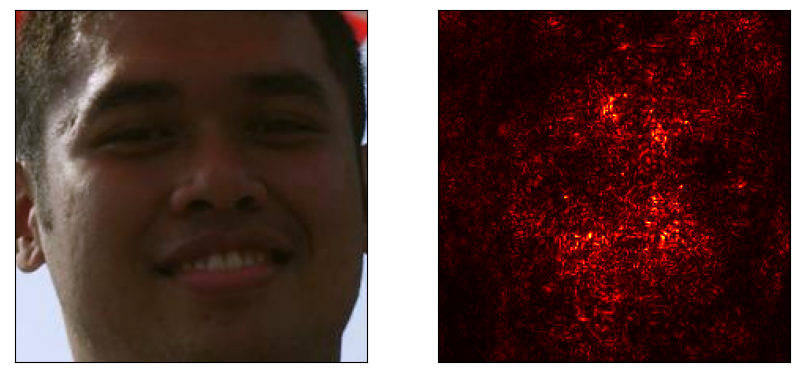

In [ ]:
img = Image.open(path_img).convert('RGB')
saliency(img, model)

In [ ]:
img_227 = './val_/Latino_Hispanic/227.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


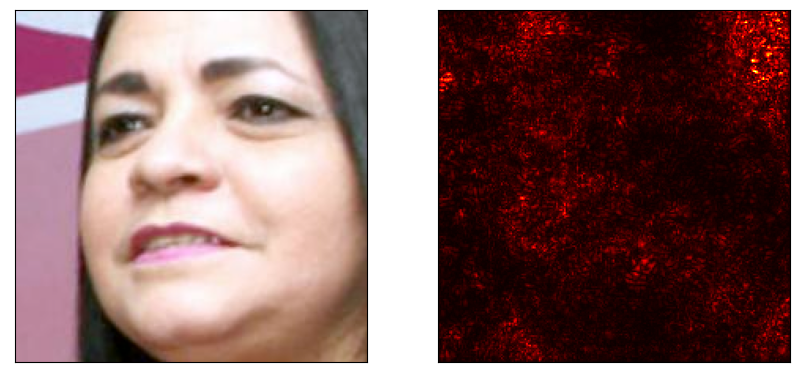

In [ ]:
img = Image.open(img_227).convert('RGB')
saliency(img, model)

In [ ]:
img_926 = './val_/Latino_Hispanic/926.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


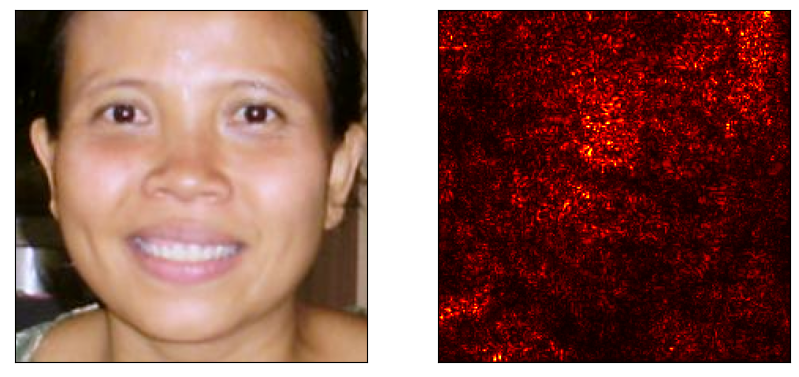

In [ ]:
img = Image.open(img_926).convert('RGB')
saliency(img, model)

In [ ]:
img_10081 = './val_/Black/10081.jpg'

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


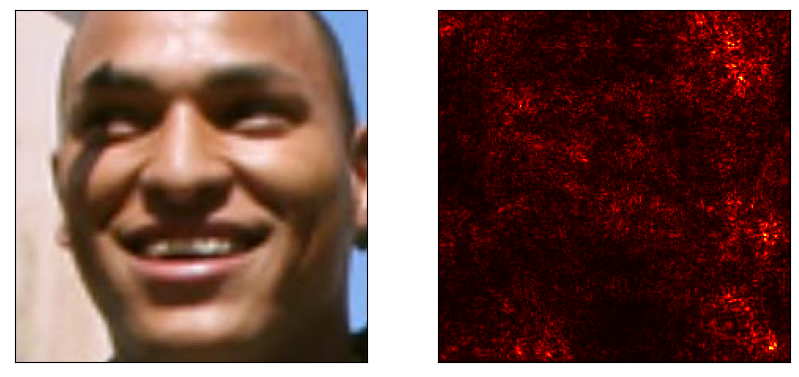

In [ ]:
img = Image.open(img_10081).convert('RGB')
saliency(img, model)

In [ ]:
class_light_skin =[ "3850.jpg" "4631.jpg" "7061.jpg" "5477.jpg" "4399.jpg" "6435.jpg" "7193.jpg" "7038.jpg" "7276.jpg" "8883.jpg" "9438.jpg"...
         "2402.jpg" "3691.jpg" "3752.jpg" "5911.jpg" "5915.jpg" "3935.jpg" "3962.jpg" "5291.jpg" "5480.jpg" "6297.jpg" "6483.jpg" "6435.jpg"...
        "7038.jpg" "7197.jpg" "7250.jpg" "7415.jpg" "8291.jpg"];

In [ ]:
len(class_light_skin)

27

### using captum

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


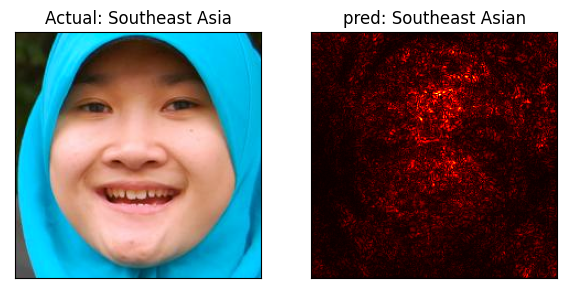

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


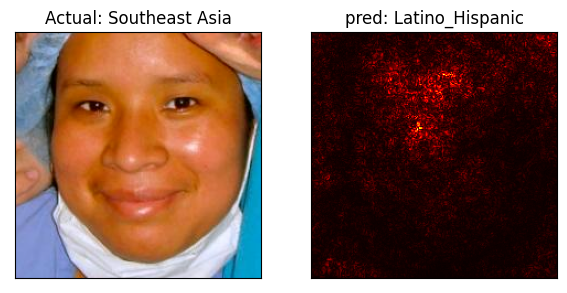

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


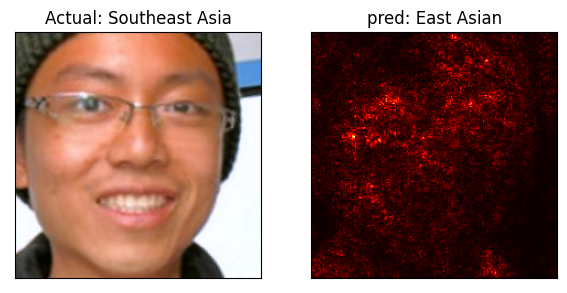

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


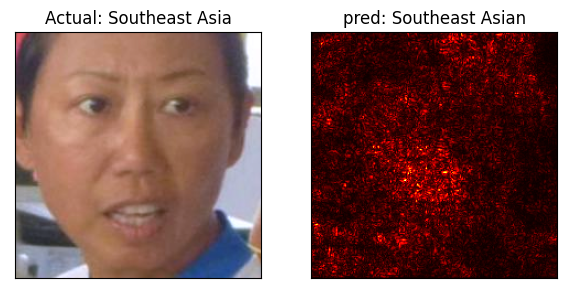

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


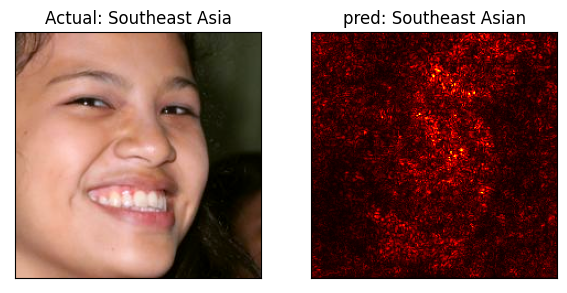

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


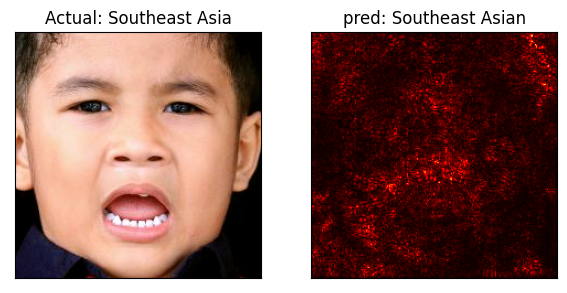

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


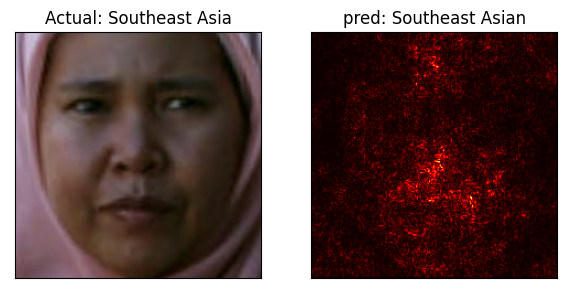

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


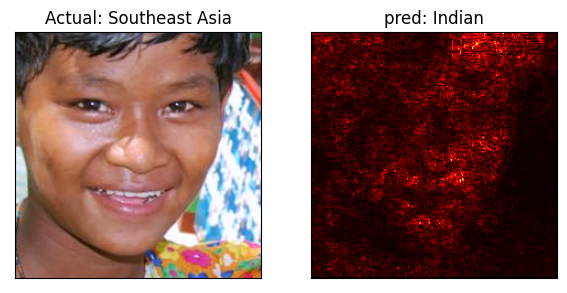

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


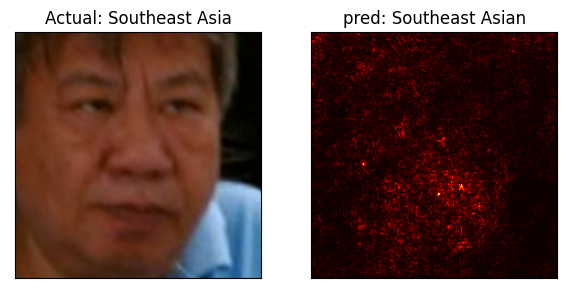

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


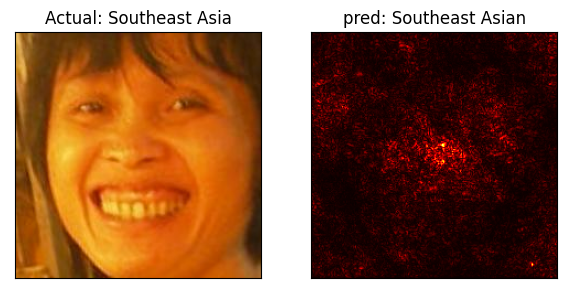

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


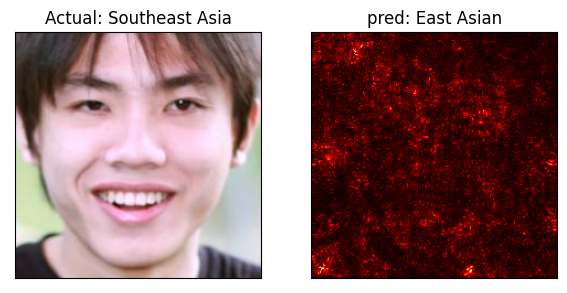

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


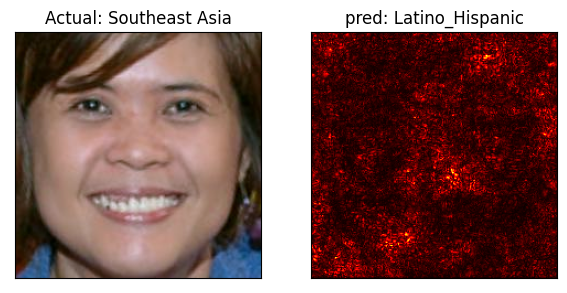

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


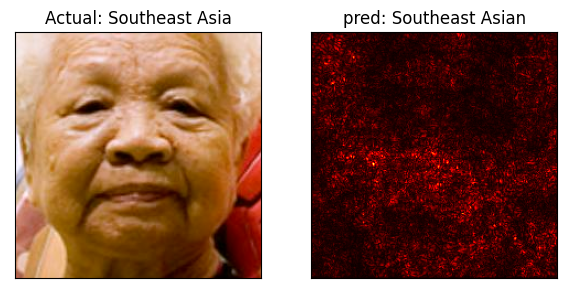

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


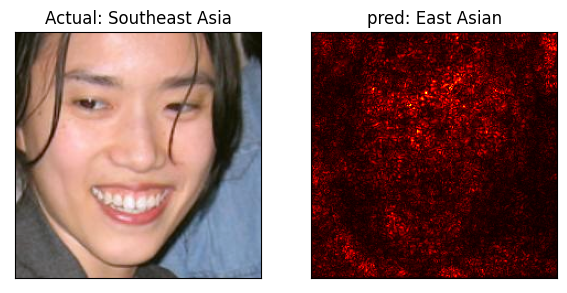

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


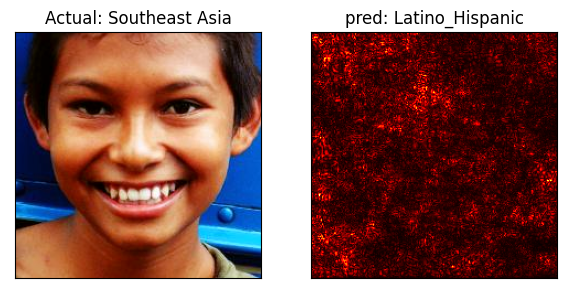

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


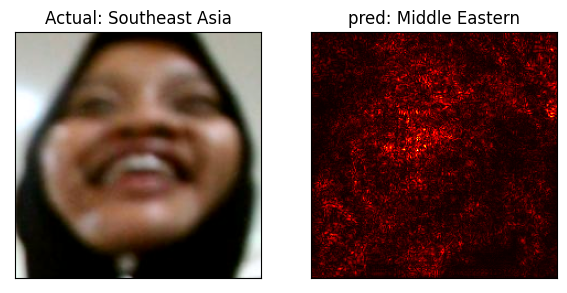

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


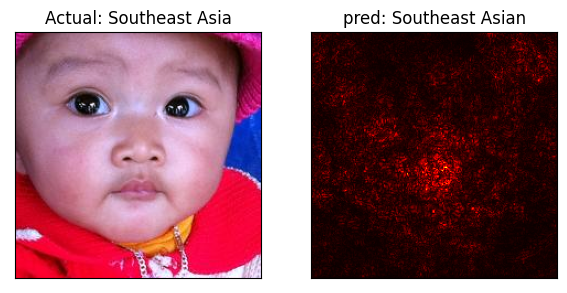

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


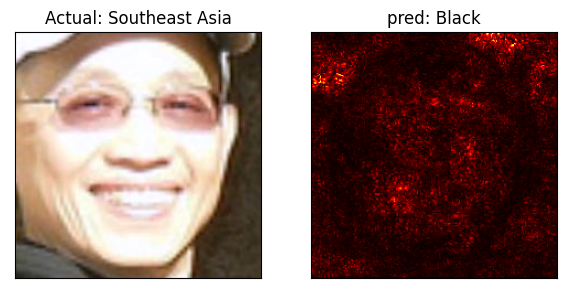

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


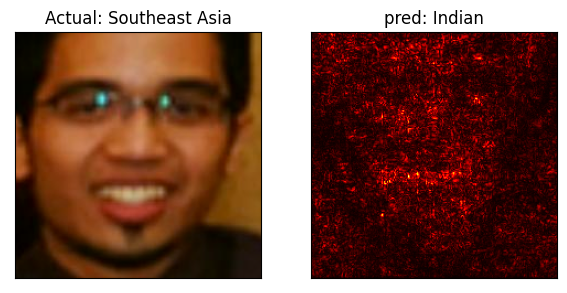

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


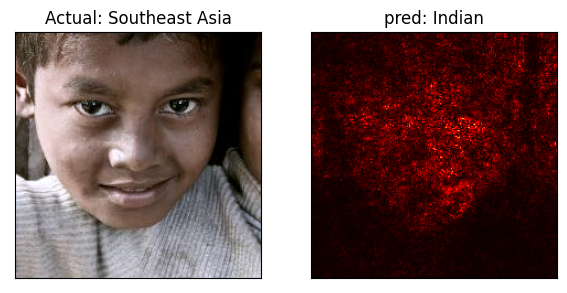

FileNotFoundError: [Errno 2] No such file or directory: './train_/Southeast Asian/9288.jpg'

In [ ]:

path_dict ={"Middle Eastern": "./train_/Middle Eastern/"+ str(idx),
            "Latino Hispacni": "./train_/Middle Eastern/"+ str(idx),
           "black":"./train_/Middle Eastern/"+ str(idx),
           "East Asian":"./train_/East Asian/" + str(idx)+".jpg" }

class_light_skin =[ 3850, 4631, 7061, 5477, 4399, 6435, 7038 ,7276, 8883, 9438, 2402,3691, 3752 ,5911 ,5915 ,3935 ,3962 ,5291 ,5480, 6297, 6483, 6435, 7038 ,7197 ,7250, 7415,8291]

class_dark_skin = [9112, 9487, 9488, 9306,9306, 9765, 10630, 11299, 11948, 2634, 3119, 2634, 3695, 7607, 5171, 7327, 9988, 2658, 11727,10001]

mid_east = ["713.jpg", "78.jpg", "1102.jpg" ,"1483.jpg", "537.jpg", "1536.jpg", "2722.jpg" ,"3043.jpg" ,"2767.jpg" ,"3411.jpg", "4056.jpg", "4870.jpg", "5092.jpg" ]
South_east_Asian =[ 219, 496, 996, 906, 1241, 1583 ,1538, 2068, 2157, 2808 ,3794 ,4069 ,4464, 7972, 450, 5081, 5191, 7663, 8413 ,8783 ,9288];
South_east_Asian =[ 496, 1241, 1583, 2068, 3794 ,4069 ,4464,360 ,1859, 661,3142];

East_Asia = [1362, 1061, 1561, 1436, 1009, 1500, 2382, 2396, 3032 ,4052, 4122, 4329 ,5102,5222, 6497, 6688, 6798, 4495 ,5287, 5563]
hisp_misclas = [South_east_Asian]
path =""
        
for typ in hisp_misclas:
    for i,idx in enumerate(typ):
        path = "./train_/Southeast Asian/" + str(idx)+".jpg"
        img = Image.open(path).convert('RGB')
        saliency(img, model,i)
        
        